In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/sample_data/creditcard.csv")

In [ ]:
df_train = df[:100000] # We cut in two the original dataset
df_train_1 = df_train[df_train['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train[df_train['Class'] == 0]
print('Number of Fraud Transaction = ' + str(len(df_train_1)))

df_sample=df_train_0.sample(len(df_train_1))
df_train = pd.concat([df_train_1, df_sample], ignore_index=True)

df_shuffled = df_train.sample(frac=1.0, random_state=42)
df_train.isnull().values.any()
df_shuffled.head()

Number of Fraud Transaction = 81


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158,7597,1.153987,0.283584,0.838993,1.470861,-0.516110,-0.685372,-0.143849,-0.184174,1.460753,...,-0.213410,-0.437054,0.020242,0.282380,0.367860,-0.519080,-0.000593,0.029959,36.00,0.0
109,26068,-0.668507,1.236959,0.611968,-0.445512,0.916141,0.269422,0.758739,-0.020749,0.293835,...,-0.446608,-0.887569,-0.166195,-1.398722,0.017254,0.170739,0.302737,-0.008571,8.92,0.0
131,3838,-0.135844,0.140612,1.480959,-1.135779,0.213653,0.209191,0.517702,-0.574806,0.624232,...,-0.248519,-0.084275,-0.248024,-0.470722,-0.182614,-0.453076,-0.722735,-0.650468,39.82,0.0
55,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1.0
94,974,-1.239073,1.067509,0.994389,1.296631,-0.291872,0.134952,0.108316,0.718812,-0.384876,...,0.033633,0.285033,-0.078231,0.210294,-0.108952,-0.244278,0.420980,0.168597,40.20,0.0


In [ ]:
# Split the data into features and labels
x = df_shuffled.drop('Class', axis=1)
y = df_shuffled['Class']
x.shape

(162, 30)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape

(129, 30)

In [ ]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
acc = []
acc_tr = []
coefficient = []
i=0
df = pd.DataFrame(columns = ['c','train_acc','test_acc'])
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    coef = svm.coef_

    p_tr = svm.predict(X_train)
    a_tr = accuracy_score(y_train, p_tr)

    pred = svm.predict(X_test)
    a = accuracy_score(y_test, pred)

    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

    df.loc[i] = [c,a_tr,a]
    i=i+1

In [ ]:
df

,c,train_acc,test_acc
0,0.0001,0.527132,0.393939
1,0.0010,0.782946,0.878788
2,0.0100,0.945736,0.969697
3,0.1000,0.953488,1.000000
4,1.0000,0.976744,1.000000
5,10.0000,1.000000,0.969697
6,100.0000,1.000000,0.969697
7,1000.0000,1.000000,0.969697
8,10000.0000,1.000000,0.969697


<ipython-input-27-9d50986de290>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")


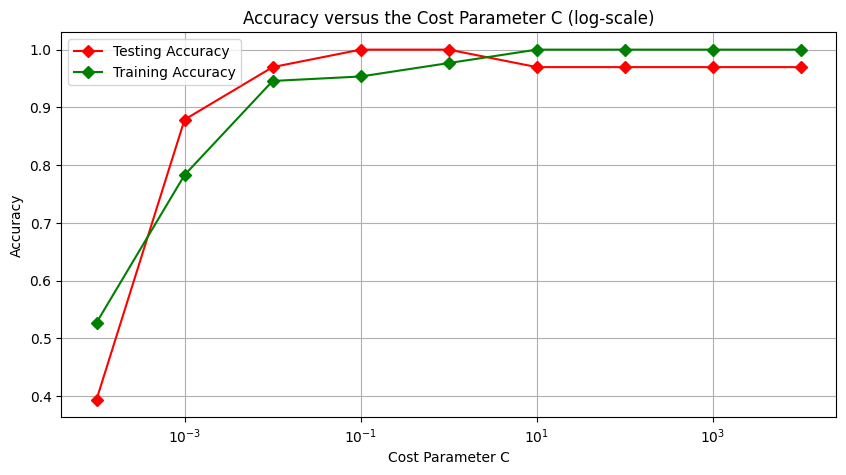

In [ ]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

plt.subplots(figsize=(10, 5))
plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
plt.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
plt.grid(True)
plt.xlabel("Cost Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Cost Parameter C (log-scale)')
plt.show()

In [ ]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','degree','train_acc','test_acc'])
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for degree in [2,3,4,5,10]:
        svm = SVC(kernel='poly', C=c, degree=degree)
        model = svm.fit(X_train, y_train)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_

        p_tr = svm.predict(X_train)
        a_tr = accuracy_score(y_train, p_tr)

        pred = svm.predict(X_test)
        a = accuracy_score(y_test, pred)

        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,degree,a_tr,a]
        i=i+1

In [ ]:
df

,c,degree,train_acc,test_acc
0,0.0001,2.0,0.527132,0.393939
1,0.0001,3.0,0.527132,0.393939
2,0.0001,4.0,0.527132,0.393939
3,0.0001,5.0,0.534884,0.393939
4,0.0001,10.0,0.627907,0.575758
5,0.0010,2.0,0.527132,0.393939
6,0.0010,3.0,0.527132,0.393939
7,0.0010,4.0,0.534884,0.393939
8,0.0010,5.0,0.542636,0.393939
9,0.0010,10.0,0.744186,0.696970


from matplotlib import pyplot as plt
_df_15['c'].plot(kind='hist', bins=20, title='c')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['degree'].plot(kind='hist', bins=20, title='degree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['train_acc'].plot(kind='hist', bins=20, title='train_acc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['test_acc'].plot(kind='hist', bins=20, title='test_acc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='c', y='degree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='degree', y='train_acc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='train_acc', y='test_acc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['c']
  ys = series['degree']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('degree')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['c']
  ys = series['train_acc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('train_acc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['c']
  ys = series['test_acc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('test_acc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['c']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'c'}, axis=1)
              .sort_values('c', ascending=True))
  xs = counted['c']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_26['c'].plot(kind='line', figsize=(8, 4), title='c')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['degree'].plot(kind='line', figsize=(8, 4), title='degree')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['train_acc'].plot(kind='line', figsize=(8, 4), title='train_acc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['test_acc'].plot(kind='line', figsize=(8, 4), title='test_acc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for g in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel='rbf', C=c, gamma=g)
        model = svm.fit(X_train, y_train)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_

        p_tr = svm.predict(X_train)
        a_tr = accuracy_score(y_train, p_tr)

        pred = svm.predict(X_test)
        a = accuracy_score(y_test, pred)

        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,g,a_tr,a]
        i=i+1

In [ ]:
df

,c,gamma,train_acc,test_acc
0,0.0001,0.001,0.527132,0.393939
1,0.0001,0.010,0.527132,0.393939
2,0.0001,0.100,0.527132,0.393939
3,0.0001,1.000,0.527132,0.393939
4,0.0001,10.000,0.527132,0.393939
5,0.0001,100.000,0.527132,0.393939
6,0.0010,0.001,0.527132,0.393939
7,0.0010,0.010,0.527132,0.393939
8,0.0010,0.100,0.527132,0.393939
9,0.0010,1.000,0.527132,0.393939


In [ ]:
pd.DataFrame(coefficient[15]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.009324,-0.009417,-0.006861,-0.008226,-0.007763,-0.007659,-0.01,-0.0091,-0.00903,-0.009035,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [ ]:
pd.DataFrame(coefficient[15]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.009324,-0.009417,-0.006861,-0.008226,-0.007763,-0.007659,-0.01,-0.0091,-0.00903,-0.009035,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


The support vectors identified by the SVC each belong to a certain class (0 and
1). In the dual coefficients, they are ordered according to the class they belong to. There are as many rows in each group as there are support vectors i.e. 129.

In [ ]:
pd.DataFrame(n_supp[15]) # n_support_

,0
0,68
1,61


"nsupport" divides the number of support vestors by the class. So we can say that when class 0 has 68 support vectors, it means 68 are the positive support vectors and rest all are the negative support vectors for 0-versus-rest classifier.